<a href="https://colab.research.google.com/github/PhamTienLoc/Lab_ML/blob/main/Lab_10_21130429_PhamTienLoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods** using sklearn api.

*   **Deadline: 23:59, 20/5/2024**



# Import libraries

In [3]:
# code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from prettytable import PrettyTable
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn import set_config
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/data


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [3]:
#code
iris = datasets.load_iris()
X = iris.data
y = iris.target

svm_clf =svm.SVC(kernel="sigmoid", random_state=0)

svm_scores = cross_validate(svm_clf, X, y, scoring='accuracy', cv=10)

print(sorted(svm_scores.keys()))
print(np.mean(svm_scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest**, **kNN** algorithm with cross validation

In [28]:
#code
X_new = SelectKBest(chi2, k = 2).fit_transform(X, y)

rf_clf = RandomForestClassifier(n_estimators=100)
rf_scores = cross_validate(rf_clf, X_new, y, scoring='accuracy', cv=10)

kNN_clf = KNeighborsClassifier(n_neighbors=10)
kNN_scores = cross_validate(kNN_clf, X_new, y, scoring='accuracy', cv=10)

*  1.3 Compare the obtained results of these approaches (SVM, RandomForest, kNN) using PrettyTable

In [29]:
#code
t = PrettyTable(['Algorithms', 'Test score'])
t.add_row(['SVM', np.mean(svm_scores['test_score'])])
t.add_row(['Random Forest with feature selection', np.mean(rf_scores['test_score'])])
t.add_row(['kNN with feature selection', np.mean(kNN_scores['test_score'])])

print(t)

+--------------------------------------+---------------------+
|              Algorithms              |      Test score     |
+--------------------------------------+---------------------+
|                 SVM                  | 0.06666666666666668 |
| Random Forest with feature selection |  0.9666666666666666 |
|      kNN with feature selection      |         0.96        |
+--------------------------------------+---------------------+


#Task 2. With fashion dataset:
*   2.1. Apply **K-Means** algorithm using k=10,

In [35]:
# code
data1 = pd.read_csv('fashion_train.csv')
data2 = pd.read_csv('fashion_test.csv')
X_train = data1.drop(columns='y')
y_train = data1[['y']]
X_test = data2.drop(columns='y')
y_test = data2[['y']]

kmeans = KMeans(n_clusters = 10, random_state = 42, n_init="auto")
kmeans.fit(X_train)
y_pred_clusters = kmeans.predict(X_test)

labels = np.zeros_like(y_pred_clusters)
for i in range(10):
  mask = (y_pred_clusters == i)
  #print(mask)
  labels[mask] = mode(y_test[mask])[0]
  #print(labels[mask])
print("K-Means")
print("Accuracy:", metrics.accuracy_score(y_test, labels))
print("Precision:", metrics.precision_score(y_test, labels, average='macro'))
print("Recall:", metrics.recall_score(y_test, labels, average='macro'))
print("F1 measure:", metrics.f1_score(y_test, labels, average='macro'))

K-Means
Accuracy: 0.524
Precision: 0.41967010205210287
Recall: 0.523296973343057
F1 measure: 0.45717987887159406


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **SVM** in terms of accuracy, precision, recall, f1 using cross validation.


In [31]:
# code
def printScore(model):
  print("Accuracy:", cross_val_score(model, X_train, y_train.values.ravel(), cv=10, scoring='accuracy').mean())
  print("Precision:", cross_val_score(model, X_train, y_train.values.ravel(), cv=10, scoring='precision_macro').mean())
  print("Recall:", cross_val_score(model, X_train, y_train.values.ravel(), cv=10, scoring='recall_macro').mean())
  print("F1 measure:",cross_val_score(model, X_train, y_train.values.ravel(), cv=10, scoring='f1_macro').mean())

rf_model = RandomForestClassifier(n_estimators=100)
print("RandomForest")
printScore(rf_model)

print("-------------------------------------")
kNN_model = KNeighborsClassifier()
print("kNN")
printScore(kNN_model)

print("-------------------------------------")
svm_model = svm.SVC(kernel='rbf', random_state=0)
print("SVM")
printScore(svm_model)

RandomForest
Accuracy: 0.7949999999999999
Precision: 0.8053009097455692
Recall: 0.8012847707847708
F1 measure: 0.794754880416652
-------------------------------------
kNN
Accuracy: 0.763
Precision: 0.7907057786984256
Recall: 0.7690442890442889
F1 measure: 0.7665658445110697
-------------------------------------
SVM
Accuracy: 0.792
Precision: 0.8078633793537044
Recall: 0.7993552836052835
F1 measure: 0.7948694638113898


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [37]:
#code
print("Ở đây ta thấy đối với bài toán trên thì Supervised learning (học có giám sát) cho ra kết quả tốt hơn")

Ở đây ta thấy đối với bài toán trên thì Supervised learning (học có giám sát) cho ra kết quả tốt hơn


2.4. Apply **AgglomerativeClustering** algorithm to fashion dataset using the number of clusters is 10

In [39]:
#code
cluster = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
cluster.fit_predict(X_test)
cluster.labels_

array([1, 4, 8, 5, 0, 4, 6, 3, 3, 1, 0, 0, 9, 7, 4, 6, 9, 2, 0, 6, 8, 9,
       4, 9, 0, 5, 0, 4, 0, 3, 3, 4, 0, 4, 4, 8, 8, 9, 5, 1, 1, 1, 6, 4,
       4, 4, 9, 4, 6, 6, 3, 9, 7, 4, 1, 5, 9, 3, 1, 4, 9, 1, 1, 8, 5, 1,
       8, 1, 5, 2, 6, 5, 8, 7, 4, 7, 0, 4, 6, 5, 8, 9, 9, 0, 5, 0, 4, 5,
       6, 4, 4, 9, 3, 1, 1, 4, 8, 1, 9, 0, 4, 0, 6, 6, 0, 9, 2, 9, 3, 6,
       1, 4, 4, 9, 2, 2, 1, 8, 0, 1, 4, 9, 1, 8, 3, 1, 2, 9, 2, 9, 4, 2,
       8, 5, 2, 8, 2, 4, 9, 1, 3, 8, 3, 8, 3, 2, 9, 5, 1, 2, 7, 6, 4, 0,
       0, 9, 3, 5, 3, 7, 4, 1, 3, 8, 9, 9, 3, 9, 7, 8, 7, 6, 1, 2, 3, 4,
       1, 1, 3, 0, 9, 9, 0, 0, 4, 7, 5, 9, 0, 3, 1, 1, 8, 1, 0, 0, 1, 0,
       2, 3, 2, 3, 7, 1, 8, 4, 4, 9, 8, 5, 4, 6, 1, 9, 8, 1, 4, 4, 5, 1,
       9, 8, 2, 4, 4, 3, 8, 5, 0, 9, 7, 2, 4, 9, 0, 6, 0, 4, 4, 9, 8, 5,
       1, 9, 8, 4, 7, 4, 0, 3, 4, 3, 4, 1, 5, 2, 4, 0, 1, 4, 3, 1, 4, 7,
       3, 4, 3, 5, 4, 0, 3, 1, 3, 4, 4, 9, 5, 1, 1, 2, 8, 4, 1, 4, 6, 7,
       9, 2, 5, 1, 1, 8, 9, 4, 1, 6, 3, 0, 5, 5, 5,

#Task 3.
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





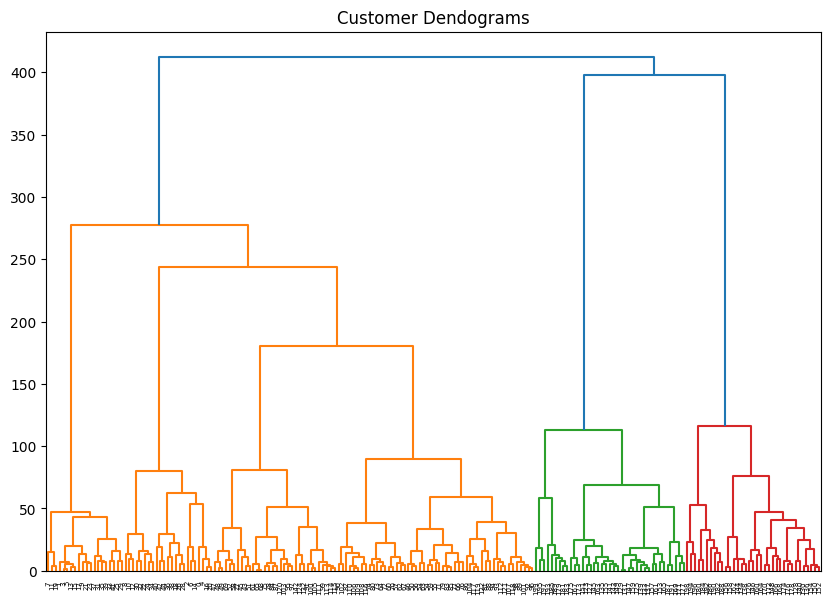

In [10]:
#code
shopping_data = pd.read_csv("shopping-data.csv")
new_shopping_data = shopping_data.drop(["CustomerID","Genre"], axis='columns')

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(new_shopping_data.iloc[:, 0:len(new_shopping_data.columns)], method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [ ]:
#code

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [ ]:
#code

#Finally,
Save a copy in your Github. Remember renaming the notebook.